# Importing data files
*   Collecting data (From data understanding)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
path = "/content/drive/MyDrive/Analysis project(IBM-Nation)-1/Product Data Set - Student 2 of 3.csv"
product_data = pd.read_csv(path, sep = '|')
product_data.head(2)

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35


In [4]:
path = "/content/drive/MyDrive/Analysis project(IBM-Nation)-1/Transaction Data Set - Student 3 of 3.csv"
transactions_data = pd.read_csv(path, sep = '|')
transactions_data.head(2)

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0


In [5]:
path = "/content/drive/MyDrive/Analysis project(IBM-Nation)-1/Customer Data Set - Student 1 of 3.csv"
customer_data = pd.read_csv(path, sep = ',')
customer_data.head(2)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married


# Data Exploration
*   From Data understanding & preparation





Check dimenstional of dataframe

In [6]:
print('product_data Dimensions: ',product_data.shape)
print('transactions_data Dimensions: ',transactions_data.shape)
print('customer_data Dimensions: ',customer_data.shape)

product_data Dimensions:  (30, 3)
transactions_data Dimensions:  (10000, 6)
customer_data Dimensions:  (500, 9)


--> conclude that Retailer X sells 30 products and served 500 customers in a total of 10,000 recorded transactions

In [7]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME              object
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

--> We need to remnove Dollar sign ($) from INCOME column & remove comma sign (",") to be an integer type to be able to apply any mathematical operations.

In [8]:
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: x.replace('$', ''))
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: int(x.replace(',', '')))
customer_data.head(1)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single


In [9]:
customer_data['INCOME'].describe()

count       500.000000
mean      85792.482000
std       37157.766304
min       20256.000000
25%       52429.000000
50%       86846.500000
75%      118381.000000
max      149999.000000
Name: INCOME, dtype: float64

In [10]:
print("Describe :\n", customer_data['MARITAL STATUS'].describe())
print("\n", customer_data['MARITAL STATUS'].unique())

Describe :
 count         500
unique          4
top       Married
freq          267
Name: MARITAL STATUS, dtype: object

 ['Single' 'Married' 'Divorced' 'Widow/Widower']


--> We need to use unique() function to know all values in column 
*   as we get customer_data['MARITAL STATUS'] unique = 4. 



In [11]:
print("Describe :\n",customer_data['LOYALTY GROUP'].describe())
print("\n",customer_data['LOYALTY GROUP'].unique())

Describe :
 count          500
unique           2
top       enrolled
freq           264
Name: LOYALTY GROUP, dtype: object

 ['enrolled' 'notenrolled']


-->The Enrolment Date column is a date and should be represented as a datetime object 
*   We use datetime library & datetime.strptime function that return date_string



In [85]:
from datetime import datetime 
#  customer_data['ENROLLMENT DATE'] = customer_data['ENROLLMENT DATE'].map(lambda x :datetime.strptime(x, '%d-%m-%y'))
# customer_data.head(2)

IndentationError: ignored

==> We get a TypeError: strptime() argument 1 must be str, not float
*   So we need to check ENROLLMENT DATE column

In [13]:
customer_data['ENROLLMENT DATE'].unique()

array(['06-03-2013', nan, '02-09-2010', '06-04-2015', '01-01-2014',
       '27-05-2009', '06-01-2006', '17-01-2005', '27-06-2009',
       '15-02-2010', '27-08-2009', '05-06-2008', '06-06-2005',
       '12-05-2013', '01-10-2013', '06-10-2011', '14-02-2008',
       '08-09-2011', '23-10-2010', '07-09-2015', '28-08-2004',
       '18-08-2010', '16-11-2004', '19-08-2014', '12-11-2009',
       '23-05-2014', '26-07-2015', '22-07-2014', '01-04-2016',
       '23-11-2015', '04-10-2009', '10-03-2006', '07-06-2008',
       '20-07-2014', '09-08-2012', '09-09-2013', '18-01-2010',
       '18-09-2009', '05-09-2012', '19-05-2006', '03-09-2013',
       '21-09-2013', '28-09-2013', '19-05-2010', '18-01-2011',
       '11-09-2011', '09-03-2009', '29-04-2014', '01-05-2007',
       '26-10-2007', '04-07-2009', '18-11-2005', '12-02-2015',
       '17-08-2005', '17-03-2012', '30-10-2014', '30-04-2015',
       '29-11-2004', '27-04-2010', '19-04-2015', '22-12-2013',
       '12-09-2010', '25-09-2004', '04-07-2007', '

**There is a NAT values in columns**

We applied a filter on column to bypass this error by:: 
*   DataFrame[column][Column Filter Condition]

In [14]:
from datetime import datetime 
customer_data['ENROLLMENT DATE'] = customer_data['ENROLLMENT DATE'][customer_data['ENROLLMENT DATE'].notnull()].map(lambda x :datetime.strptime(x, '%d-%m-%Y'))
customer_data.head(2)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single
1,10002,0,42,94475,9,notenrolled,NaT,6,Married


All dataframes are Checked for null values

In [15]:
print("null vales for transactions: ", transactions_data.isnull().values.any())
print("null vales for product: ", product_data.isnull().values.any())
print("null vales for customer: ", customer_data.isnull().values.any())

null vales for transactions:  False
null vales for product:  False
null vales for customer:  True


In [16]:
print("This column has a null values:\n",customer_data.columns[customer_data.isna().any()].tolist())

This column has a null values:
 ['ENROLLMENT DATE']


# New Section
#Analysis of the Distribution of Variables by using Graphs

**Univariate Analysis**

In [17]:
import matplotlib.pyplot as plt

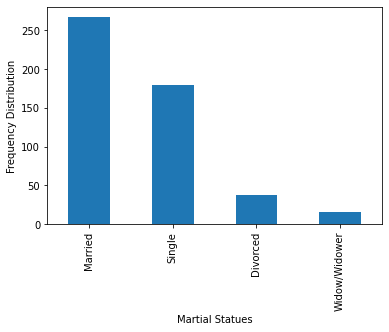

In [18]:
customer_data['MARITAL STATUS'].value_counts().plot(kind = 'bar')
plt.xlabel("Martial Statues")
plt.ylabel("Frequency Distribution")
plt.show()

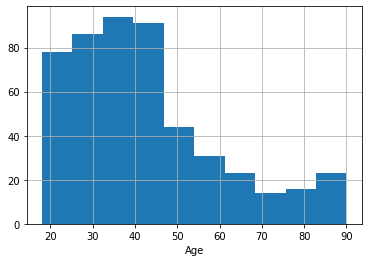

In [19]:
customer_data['AGE'].hist(bins=10)
plt.xlabel("Age")
plt.show()

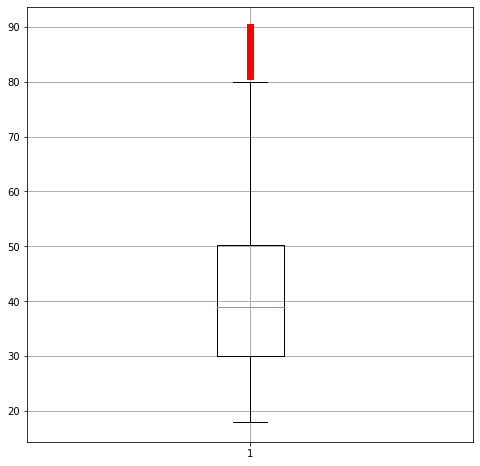

In [20]:
plt.figure(figsize=(8,8))
plt.boxplot(customer_data.AGE,0,'rs',1)
plt.grid(linestyle = '-', linewidth = 1)
plt.show()

# Creating a Customer view


*   Verifying the data quality




In [21]:
trans_products = transactions_data.merge(product_data, how ='inner', left_on = 'PRODUCT NUM', right_on = 'PRODUCT CODE')
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,$25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,$25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,$25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,$25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,$25.46


In [22]:
trans_products['UNIT LIST PRICE'] = trans_products['UNIT LIST PRICE'].map(lambda x:x.replace('$',''))
trans_products['UNIT LIST PRICE'] = trans_products['UNIT LIST PRICE'].map(lambda x:float(x.replace(',','')))
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46


**Total price column for each transaction**

In [23]:
trans_products['Total_Price'] = trans_products['QUANTITY PURCHASED'] * (1- trans_products['DISCOUNT TAKEN']) * trans_products['UNIT LIST PRICE'] 
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,Total_Price
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


**Report the revenue per product category**

In [24]:
Total_number_of_product = trans_products.groupby('PRODUCT CATEGORY').agg({'QUANTITY PURCHASED' : 'sum'}).sort_values('QUANTITY PURCHASED', ascending = False)
Total_number_of_product.head()

,QUANTITY PURCHASED
PRODUCT CATEGORY,
APPAREL,36568
ELECTRONICS,32814
FOOD,20144
HEALTH & BEAUTY,8872


In [25]:
Income_by_product = trans_products.groupby('PRODUCT CATEGORY').agg({'Total_Price' : 'sum'}).sort_values('Total_Price', ascending = False)
Income_by_product.head()

,Total_Price
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


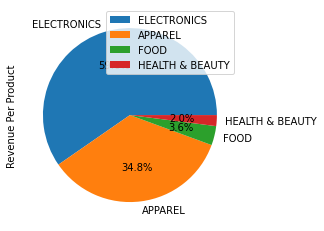

In [26]:
Revenue_by_product = Income_by_product.rename(columns = {'Total_Price' : 'Revenue Per Product'})
Revenue_by_product['Revenue Per Product'].plot(kind = 'pie', autopct = '%1.1f%%', legend = True)


Let us calculate for each customer the following measures, and see whether any of these measures affects loyalty enrolment:
*   Total spends per category
*   Total spends
*   Most recent transaction dates
*   Average Discount taken







In [27]:
customer_prod_categ = trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'Total_Price': 'sum'})
customer_prod_categ.head()

Total_Price
CUSTOMER NUM PRODUCT CATEGORY             
10001        APPAREL              4022.430
             ELECTRONICS          1601.315
             FOOD                   68.688
             HEALTH & BEAUTY      1134.337
10002        APPAREL              2312.509

In [28]:
customer_prod_categ.columns

Index(['Total_Price'], dtype='object')

In [29]:
customer_prod_categ.reset_index().head()

,CUSTOMER NUM,PRODUCT CATEGORY,Total_Price
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509


In [31]:
customer_pivot=customer_prod_categ.pivot_table(index= 'CUSTOMER NUM',columns='PRODUCT CATEGORY',values='Total_Price')
customer_pivot.head()

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN


Total spends &
Most recent transaction dates

In [33]:
trans_products['TRANSACTION DATE']=trans_products['TRANSACTION DATE'].map(lambda x :datetime.strptime(x, '%m/%d/%Y') )

**calculate the latest transaction date and the total spend for each customer**

In [40]:
recent_trans_total_spend = trans_products.groupby('CUSTOMER NUM').agg({'TRANSACTION DATE' : 'max', 'Total_Price' : 'sum' })
recent_trans_total_spend = recent_trans_total_spend.rename(columns = {'TRANSACTION DATE': 'Recent Transaction Dates', 'Total_Price': 'Total Spent' })
recent_trans_total_spend.head()

,Recent Transaction Dates,Total Spent
CUSTOMER NUM,,
10001,2015-12-24,6826.770
10002,2015-12-21,5062.451
10003,2015-12-31,8562.440
10004,2015-12-17,5522.694
10005,2015-12-22,213.512


In [39]:
recent_trans_total_spend.reset_index().head()

,CUSTOMER NUM,TRANSACTION DATE,Total_Price
0,10001,2015-12-24,6826.770
1,10002,2015-12-21,5062.451
2,10003,2015-12-31,8562.440
3,10004,2015-12-17,5522.694
4,10005,2015-12-22,213.512


In [41]:
customer_KPIS = customer_pivot.merge(recent_trans_total_spend, how = 'inner', left_index= True , right_index = True)
customer_KPIS.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,Recent Transaction Dates,Total Spent
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,NaN,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,NaN,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,NaN,2015-12-17,5522.694
10005,213.512,NaN,NaN,NaN,2015-12-22,213.512


In [45]:
customer_KPIS=customer_KPIS.fillna(0)

customer_KPIS.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,Recent Transaction Dates,Total Spent
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
10005,213.512,0.000,0.000,0.000,2015-12-22,213.512


In [46]:
customer_all_view = customer_data.merge(customer_KPIS, how ='inner', left_on='CUSTOMERID', right_index=True)
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,Recent Transaction Dates,Total Spent
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
1,10002,0,42,94475,9,notenrolled,NaT,6,Married,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
3,10004,0,38,84313,8,enrolled,2015-04-06,1,Single,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
4,10005,0,30,51498,3,notenrolled,NaT,1,Single,213.512,0.000,0.000,0.000,2015-12-22,213.512


**Bivariate Analysis**

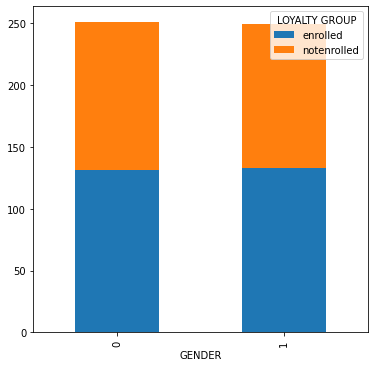

In [49]:
table = pd.crosstab(customer_all_view['GENDER'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

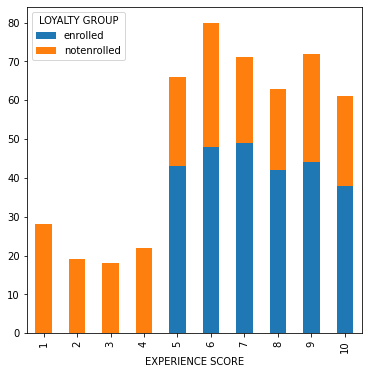

In [50]:
table = pd.crosstab(customer_all_view['EXPERIENCE SCORE'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

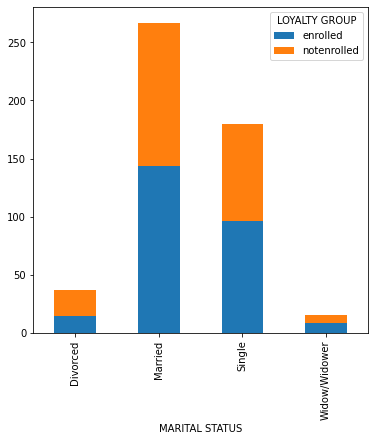

In [51]:
table = pd.crosstab(customer_all_view['MARITAL STATUS'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

Age is a continuous variable. So, we use The Pandas cut command automatically bins values into discrete intervals

In [56]:
customer_all_view['AGE_BINNED'] = pd.cut(customer_all_view['AGE'],10)
# customer_all_view['AGE_BINNED'].head(10)

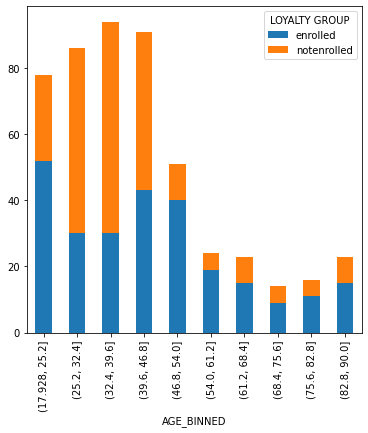

In [57]:
table = pd.crosstab(customer_all_view['AGE_BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

**There is some sort of significants relationship between ages**

In [61]:
customer_all_view.groupby("LOYALTY GROUP").agg({'AGE': 'mean'}).reset_index()

,LOYALTY GROUP,AGE
0,enrolled,44.723485
1,notenrolled,39.622881


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


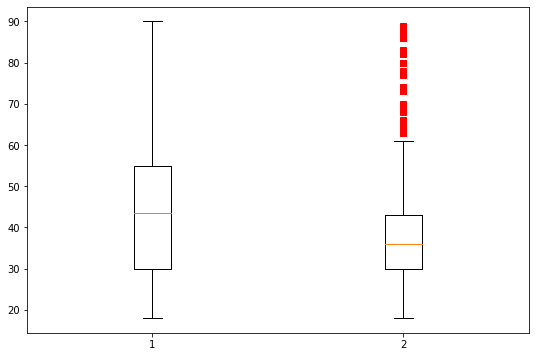

In [66]:
fig = plt.figure(1, figsize=(9,6))
ax = fig.add_subplot(111)
plot1= customer_all_view['AGE'] [customer_all_view['LOYALTY GROUP'] == 'enrolled']
plot2= customer_all_view['AGE'] [customer_all_view['LOYALTY GROUP'] == 'notenrolled']
Plot = [plot1,plot2]
ax.boxplot(Plot,0,'rs',1)

plt.show()

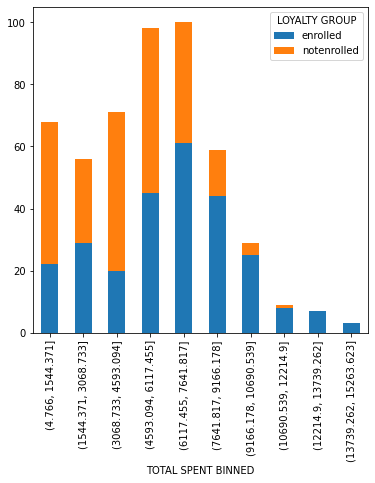

In [74]:
customer_all_view['TOTAL SPENT BINNED'] = pd.cut(customer_all_view['Total Spent'],10)
# customer_all_view['TOTAL SPENT BINNED'].head(10)
table = pd.crosstab(customer_all_view['TOTAL SPENT BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind = 'bar', stacked=True,figsize=(6,6))
plt.show()

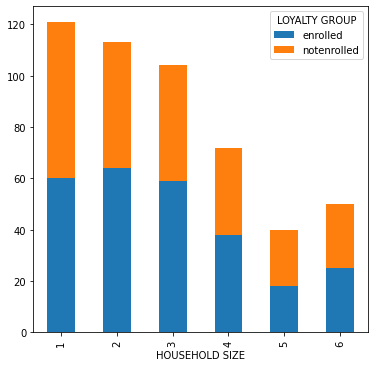

In [80]:
table = pd.crosstab(customer_all_view['HOUSEHOLD SIZE'],customer_all_view['LOYALTY GROUP'])
table.plot(kind = 'bar',stacked=True,figsize=(6,6))
plt.show()

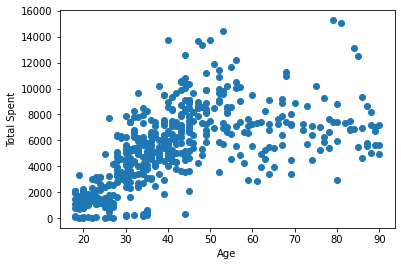

In [81]:
plt.scatter(customer_all_view['AGE'],customer_all_view['Total Spent'])
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.show()

In [83]:
from scipy.stats import pearsonr
pearsonr(customer_all_view['AGE'],customer_all_view['Total Spent'])

(0.5760170677259272, 1.560821750277651e-45)

In [84]:
correlation_value = customer_all_view[['AGE','Total Spent']].dropna() #deopna() function is used for drop any missing values if existed
correlation_value.corr()

,AGE,Total Spent
AGE,1.000000,0.576017
Total Spent,0.576017,1.000000
